In [63]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

airline_delay_df = pd.read_csv('Airline_Delay_Cause.csv')
airline_delay_df.info()
airline_delay_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [64]:
airline_delays_df = airline_delay_df.dropna()
airline_delays_df.info()

#check for duplicate rows based on identifying columns, not just 
duplicate = airline_delays_df[airline_delays_df.duplicated(['year', 'month', 'carrier', 'airport'])]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317289 non-null  int64  
 1   month                317289 non-null  int64  
 2   carrier              317289 non-null  object 
 3   carrier_name         317289 non-null  object 
 4   airport              317289 non-null  object 
 5   airport_name         317289 non-null  object 
 6   arr_flights          317289 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317289 non-null  float64
 9   weather_ct           317289 non-null  float64
 10  nas_ct               317289 non-null  float64
 11  security_ct          317289 non-null  float64
 12  late_aircraft_ct     317289 non-null  float64
 13  arr_cancelled        317289 non-null  float64
 14  arr_diverted         317289 non-null  float64
 15  arr_delay        

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [65]:
df = pd.read_csv('Airline_Delay_Cause.csv',
                 parse_dates= {"date" : ["year","month"]},
                keep_date_col=True).dropna()
df.info()

#DATE = []
#for y, m in zip(airline_delays_df.year, airline_delays_df.month):
#    DATE.append(date(y, m, 1))

#airline_delays_df['DATE'] = DATE

#x_axis = airline_delays_df[""]
#y_axis
#airline_delays_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317289 entries, 0 to 318016
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 317289 non-null  datetime64[ns]
 1   year                 317289 non-null  object        
 2   month                317289 non-null  object        
 3   carrier              317289 non-null  object        
 4   carrier_name         317289 non-null  object        
 5   airport              317289 non-null  object        
 6   airport_name         317289 non-null  object        
 7   arr_flights          317289 non-null  float64       
 8   arr_del15            317289 non-null  float64       
 9   carrier_ct           317289 non-null  float64       
 10  weather_ct           317289 non-null  float64       
 11  nas_ct               317289 non-null  float64       
 12  security_ct          317289 non-null  float64       
 13  late_aircraft_

In [66]:
df_group = df.groupby(["airport_name"]).sum()
df_group['arr_flights'].sort_values(ascending=False)

airport_name
Atlanta, GA: Hartsfield-Jackson Atlanta International     7259395.0
Chicago, IL: Chicago O'Hare International                 5852102.0
Dallas/Fort Worth, TX: Dallas/Fort Worth International    5138128.0
Denver, CO: Denver International                          4258252.0
Los Angeles, CA: Los Angeles International                4008346.0
                                                            ...    
Spokane, WA: Fairchild AFB                                      1.0
Fort Collins/Loveland, CO: Northern Colorado Regional           1.0
Columbus, MS: Columbus AFB                                      1.0
Rapid City, SD: Ellsworth AFB                                   1.0
Kansas City, MO: Charles B. Wheeler Downtown                    1.0
Name: arr_flights, Length: 418, dtype: float64

In [67]:
df2019_2022 = df.loc[df['year'].astype(int) > 2018]
df2019_2022.head()

df2020 = df.loc[df['year'].astype(int) == 2020]

#df2020.pivot(index='month', columns = 'carrier_name', values='arr_cancelled')
#df2020_1 = df2020[['date', 'year', 'month', 'arr_cancelled']]
#df2020_1['Percent Cancelled'] = len(df2020_1.loc[df2020_1['arr_cancelled'].astype(int) > 0])/len(df2020_1)
#df2020.groupby()
#airline_delayed_df = airline_delays_df.groupby("month").sum().sort_values("delays", ascending=False)

#airline_delayed_df["Delay Pct"] = airline_delayed_df["Delays"] / airline_delayed_df["Flights"] * 100



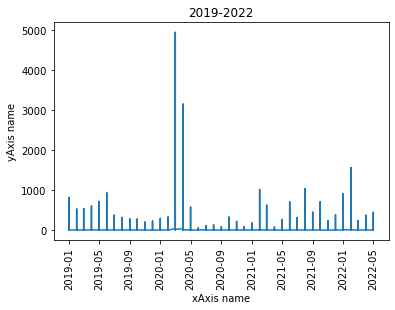

Text(0, 0.5, 'cancellations')

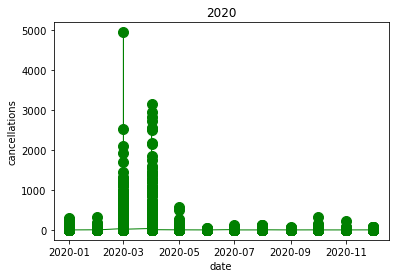

In [68]:
xAxis = df2019_2022['date']
yAxis = df2019_2022['arr_cancelled']
plt.plot(xAxis,yAxis)
plt.title('2019-2022')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.xticks(rotation="vertical")
plt.show()

#xAxis = df2020['date']
#yAxis = df2020['arr_cancelled']
#plt.plot(xAxis,yAxis)
#plt.title('2020')
#plt.xlabel('xAxis name')
#plt.ylabel('yAxis name')
#plt.xticks(rotation="vertical")
#plt.show()
x_axis = df2020['date']
y_axis = df2020['arr_cancelled']
ax1 = plt.subplots()
plt.title('2020')
plt.plot(x_axis, y_axis, linewidth=1, markersize=10, marker="o", color="green", label="Fahreneit")
plt.xlabel("date")
plt.ylabel("cancellations")